<a href="https://colab.research.google.com/github/khskhs6991/webtoon_eda/blob/main/webtoon_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 네이버 웹툰 데이터 받아오기

In [ ]:
import pandas as pd

webtoon = pd.read_csv('/content/drive/MyDrive/ITStudy/data/naver.csv')
webtoon.head()

## 베스트 도전 데이터 받아오기

In [ ]:
webtoon_challenge = pd.read_csv('/content/drive/MyDrive/ITStudy/data/naver_challenge.csv')
webtoon_challenge.head()

## 폰트 글꼴 사전작업

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt

font_address = 'https://github.com/jaekookang/Korean-WordCloud/blob/master/font/SeoulNamsanvert.ttf?raw=true'
!wget {font_address}
!mv SeoulNamsanvert.ttf?raw=true SeoulNamsanvert.ttf

%matplotlib inline

# 목차
###1. 네이버 웹툰 TOP 100 기준으로 description 워드 클라우드
###2. 네이버 웹툰, 베스트 도전 TOP 100 장르 & 연령
###3. 베스트 도전에서 정식연재로 바뀐 작품의 description 워드 클라우드
###4. 네이버웹툰, 베스트도전 -> 네이버 웹툰, 베스트도전 하위 350개의 단어 비교
###5. 네이버 웹툰 중 각 장르 top 3
###6. 네이버 웹툰 사이트의 크롤링을 통해 얻은 장르별 TOP 10
   (실제 조회수 기반 rating과 그냥 rating 비교)

# 1. 네이버 웹툰 TOP 100 기준으로 description 워드 클라우드

In [ ]:
!pip install wordcloud
!pip install konlpy
!pip install nltk

In [ ]:
# 1. Top 100 기준으로 description 워드 클라우드

import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
t = Okt()

text = webtoon.sort_values(by='rating', ascending=False).iloc[:200].description.str.cat(sep=' ')


text_no = t.nouns(text)


stop_words = ['그', '수', '것', '내', '속', '나', '이', '날', '의', '곳', '남', '두', '세', '살', '준', '은', '전', '때', '줄', '작', '못', '네', '더', '위', '후', '향', '해', 
              '또', '안', '알', '고', '로', '기', '때문', '온', '뭐', '위해', '작가', '과연']
ko_token = [each_word for each_word in text_no if each_word not in stop_words]
ko = nltk.Text(ko_token)
data = ko.vocab().most_common(100)

tmp_data = dict(data)


from wordcloud import WordCloud

wordcloud = WordCloud(font_path='SeoulNamsanvert.ttf').generate_from_frequencies(tmp_data)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='nearest') 
plt.axis("off")
plt.show()

In [ ]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
t = Okt()

## rating 을 기준으로 내림차순 정렬을 해서 작품의 설명을 나타내는 description을 형태소 분석을 위해 합쳤습니다.

In [ ]:
text = webtoon.sort_values(by='rating', ascending=False).iloc[:200].description.str.cat(sep=' ')
text

## 형태소 분석

In [ ]:
text_no = t.nouns(text)
text_no

## 불용어 처리 - 불용어 단어는 팀원들과 형태소 분석결과를 보면서 따로 뽑아냈습니다

In [ ]:
stop_words = ['그', '수', '것', '내', '속', '나', '이', '날', '의', '곳', '남', '두', '세', '살', '준', '은', '전', '때', '줄', '작', '못', '네', '더', '위', '후', '향', '해', 
              '또', '안', '알', '고', '로', '기', '때문', '온', '뭐', '위해', '작가', '과연']
ko_token = [each_word for each_word in text_no if each_word not in stop_words]
ko = nltk.Text(ko_token)
data = ko.vocab().most_common(100)
data

## 워드 클라우드에 사용하기 위해 딕셔너리 데이터로 만들어준다

In [ ]:
tmp_data = dict(data)
tmp_data

## 워드 클라우드를 나타낼때 matplotlib.pyplot 을 사용하여 나타내는데 이때 interpolation 파라미터를 사용하여 픽셀들의 축 위치 간격을 보정하여 이미지를 좀 더 자연스럽게 만들 수 있다.

In [ ]:
wordcloud = WordCloud(font_path='SeoulNamsanvert.ttf').generate_from_frequencies(tmp_data)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='SeoulNamsanvert.ttf').generate_from_frequencies(tmp_data)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='nearest') 
# interpolation 중에서 가장 고해상도인 보간법은 nearest로 가장 선명하게 잘 보인다.
plt.axis("off")
plt.show()

In [ ]:
from PIL import Image 

webtoon_mask = np.array(Image.open('./drive/MyDrive/ITStudy/data/Naver_Line_Webtoon_logo.png'))
webtoon_mask

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(webtoon_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import ImageColorGenerator

wordcloud = WordCloud(font_path='SeoulNamsanvert.ttf', width=800, height=400, mask= webtoon_mask)
wordcloud.generate_from_frequencies(frequencies=tmp_data)
image_colors = ImageColorGenerator(webtoon_mask)
wordcloud = wordcloud.recolor(color_func=image_colors)

In [ ]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('word_cloud.png')
plt.show()

In [ ]:
wordcloud = WordCloud(font_path='SeoulNamsanvert.ttf', width=800, height=400, mask= webtoon_mask, background_color = 'white')
wordcloud.generate_from_frequencies(frequencies=tmp_data)
image_colors = ImageColorGenerator(webtoon_mask)
wordcloud = wordcloud.recolor(color_func=image_colors)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="nearest")
plt.axis("off")
plt.savefig('word_cloud.png')
plt.show()

# 2. 네이버 웹툰, 베스트 도전   TOP 100 장르 & 연령 

In [ ]:
top100_all_genre = webtoon.sort_values(by='rating', ascending=False).iloc[:100].genre.str.cat(sep = ', ').split(',')

In [ ]:
import nltk
import plotly.express as px 
top100_all_genre = webtoon.sort_values(by='rating', ascending=False).iloc[:100].genre.str.cat(sep = ', ').split(',')
top100_genre_cnt = pd.DataFrame(nltk.Text(top100_all_genre).vocab().most_common(11))
top100_genre_cnt.columns = ['genre','num']

px.bar(top100_genre_cnt[::-1],x='genre',y='num',color='num', title = '네이버 웹툰 TOP 100 장르별 총합')

In [ ]:
top100_all_genre = webtoon_challenge.sort_values(by='rating', ascending=False).iloc[:100].genre.str.cat(sep = ', ').split(',')
top100_genre_cnt = pd.DataFrame(nltk.Text(top100_all_genre).vocab().most_common(7))
top100_genre_cnt.columns = ['genre','num']
px.bar(top100_genre_cnt[::-1],x='genre',y='num',color='num', title = '베스트도전 TOP 100 장르별 총합')

In [ ]:
top100_age = webtoon.sort_values(by='rating', ascending=False).iloc[:100].age.str[:2]

top100_age_cnt = pd.DataFrame(nltk.Text(top100_age).vocab().most_common(4))
top100_age_cnt.columns = ['age','num']

px.bar(top100_age_cnt[::-1],x='age',y='num',color='num', title = '네이버 웹툰 TOP 100 연령별 총합')

# 3. 베스트 도전에서 정식연재로 바뀐 작품의 description 워드 클라우드

In [ ]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from wordcloud import WordCloud
t = Okt()
upgrade_toon = webtoon_challenge.loc[webtoon_challenge.serialize == True, 'description'].str.cat(sep=' ')

toon_no = t.nouns(upgrade_toon)

stop_words = ['그', '수', '전', '위해', '이', '것', '날', '의', '나', '과연', '일', '살', '군', '은', '속',
              '뒤', '마주', '알', '애', '생', '과', '후', '세', '내', '로', '위', '앞', '대해',
              '부', '개', '온', '끼', '힘', '두', '연재']
ko_token = [each_word for each_word in toon_no if each_word not in stop_words]
ko = nltk.Text(ko_token)
data = ko.vocab().most_common(100)
tmp_data = dict(data)


wordcloud = WordCloud(font_path='SeoulNamsanvert.ttf').generate_from_frequencies(tmp_data)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()

# 4. 네이버웹툰, 베스트도전 -> 네이버 웹툰, 베스트도전 하위 350개의 단어 비교

베스트 도전에서 네이버 웹툰으로 정식 연재한 작품이 대략 350개가 있어서 전체 기준을 350개로 잡았다. 

네이버 웹툰에서 평점별 TOP 350을 추려서 불용어를 제거한 후 description에서 가장 많이 쓰인 단어 100개를 선정하였다. 

In [ ]:
text = webtoon.sort_values(by='rating', ascending=False).iloc[:350].description.str.cat(sep=' ')
text_no = t.nouns(text)
stop_words = ['그', '수', '전', '위해', '이', '것', '날', '의', '나', '과연', '일', '살', '군', '은', '속',
              '뒤', '마주', '알', '애', '생', '과', '후', '세', '내', '로', '위', '앞', '대해',
              '부', '개', '온', '끼', '힘', '두', '곳', '기', '둘', '때', '더', '중', '반', '줄', '작', '고', '못', '안', '건', '채', '번']
ko_token = [each_word for each_word in text_no if each_word not in stop_words]
ko = nltk.Text(ko_token)
data = ko.vocab().most_common(100)
tmp_data = dict(data)
tmp_data

위에서 선정한 데이터를 나중에 plotly 에서 사용하기 위해 DataFrame의 모양을 변경하였다.

In [ ]:
webtoon_top100 = pd.DataFrame.from_dict(tmp_data, orient='index', columns=['count'])
webtoon_top100 = webtoon_top100.reset_index(level=0)
webtoon_top100 = webtoon_top100.rename(columns={'index':'word'})
webtoon_top100

베스트 도전에서 네이버 웹툰으로 올라간 작품에 대해 위에했던 작업을 똑같이 반복하였다.

In [ ]:
text3 = webtoon_challenge.loc[webtoon_challenge.serialize == True, 'description'].str.cat(sep=' ')
text_no = t.nouns(text3)
stop_words = ['그', '수', '전', '위해', '이', '것', '날', '의', '나', '과연', '일', '살', '군', '은', '속',
              '뒤', '마주', '알', '애', '생', '과', '후', '세', '내', '로', '위', '앞', '대해',
              '부', '개', '온', '끼', '힘', '두']
ko_token = [each_word for each_word in text_no if each_word not in stop_words]
ko = nltk.Text(ko_token)
data = ko.vocab().most_common(100)
tmp_data = dict(data)

challenge_up = pd.DataFrame.from_dict(tmp_data, orient='index', columns=['count'])
challenge_up = challenge_up.reset_index(level=0)
challenge_up = challenge_up.rename(columns={'index':'word'})
challenge_up 

베스트 도전 하위 350 작품에 대해 위에했던 작업을 똑같이 반복하였다.

In [ ]:
text4 = webtoon_challenge.sort_values(by='rating').iloc[:350].description.str.cat(sep=' ')

text_no = t.nouns(text4)
stop_words = ['그', '수', '이', '것', '날', '살', '속', '과연', '안', '위', '일', '알', '더', '과', '보미',
              '중', '때문', '의', '때', '향', '를', '다른', '통해', '하라', '너', '후', '나', '한라', '뒤',
              '두', '도', '반', '구']
ko_token = [each_word for each_word in text_no if each_word not in stop_words]
ko = nltk.Text(ko_token)
data = ko.vocab().most_common(100)
tmp_data = dict(data)

challenge_low350 = pd.DataFrame.from_dict(tmp_data, orient='index', columns=['count'])
challenge_low350 = challenge_low350.reset_index(level=0)
challenge_low350 = challenge_low350.rename(columns={'index':'word'})
challenge_low350

plotly에서 범례를 사용하기 위해 class라는 열을 만들어 주었고, 이러한 데이터들을 하나의 DataFrame으로 만들어 주었다.

In [ ]:
webtoon_top100['class'] = '네이버 웹툰'
challenge_up['class'] = '베스트 도전 -> 네이버 웹툰'
challenge_low350['class'] = '베스트 도전 하위 350'
webtoon_df = pd.concat([webtoon_top100, challenge_up, challenge_low350], axis=0)
webtoon_df = webtoon_df.sort_values('count', ascending=False)
webtoon_df

기존에는 이런 필터 작업없이 그래프를 나타내었는데 어떤 작품에는 있고, 어떤 작품에는 없고 하는 단어들이 너무 많아 세 개의 공통된 단어들을 취합하여 저장하였다.

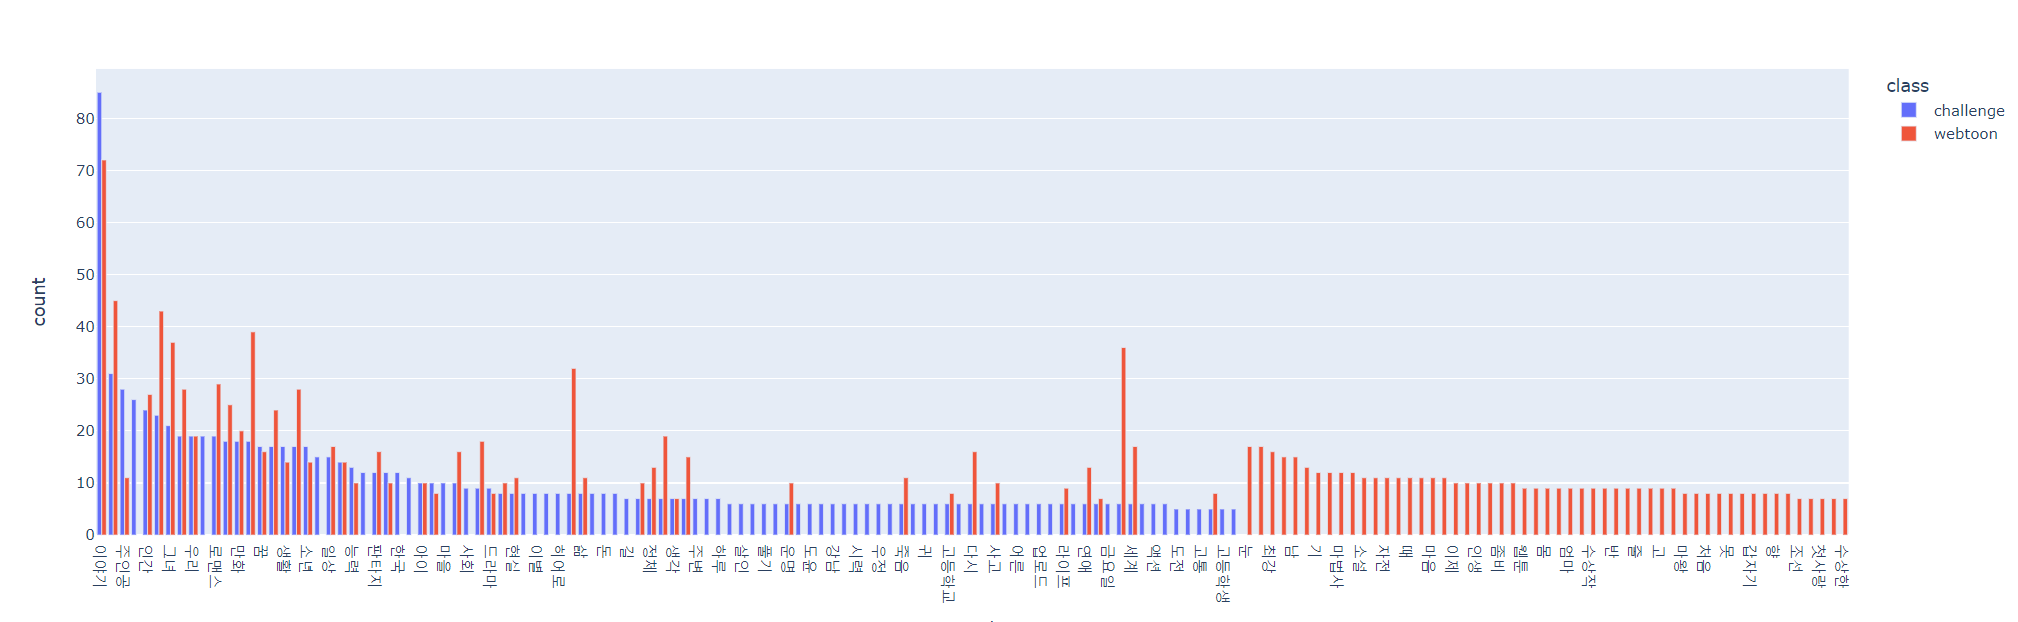

In [ ]:
words = pd.merge(webtoon_top100, challenge_up, on='word').word
challenge_low350_filtered = challenge_low350[challenge_low350.word.isin(words)].word
webtoon_df2 = webtoon_df[webtoon_df.word.isin(challenge_low350_filtered)]
webtoon_df2

In [ ]:
import plotly.express as px
px.bar(webtoon_df2, x="word", y="count",
             color='class', barmode='group', title = '네이버웹툰, 베스트도전 -> 네이버 웹툰, 베스트도전 하위 350개의 단어 비교')

# 5. 네이버 웹툰 중 각 장르 top 3

## 장르를 보면 두 가지가 합쳐져 있어서 따로 띄어주어 각각의 장르에 값으로 넣어주었다. 

In [ ]:
webtoon_splitted_by_genre = pd.DataFrame(columns=webtoon.columns)
for idx, genres in enumerate(webtoon.genre.str.split(', ')):
    toon = webtoon.iloc[idx].copy()
    toon.genre = genres[0]
    webtoon_splitted_by_genre.loc[idx*2] = toon
    toon.genre = genres[1]
    webtoon_splitted_by_genre.loc[idx*2 + 1] = toon
webtoon_splitted_by_genre.head(30)

## 데이터 중 Nan이라는 결측값을 가진 열이 존재하여 해당 열에서 가장 많이 나온 값으로 대체하였다. 

In [ ]:
webtoon_grouped_by_genre = webtoon_splitted_by_genre.groupby('genre').apply(lambda df: df.sort_values(by='rating', ascending=False)[:3])
wgbg3 = webtoon_grouped_by_genre.copy()
wgbg3 = wgbg3.drop(['date', 'link', 'id', 'description', 'genre'], axis = 1)
replace_value = nltk.Text(wgbg3['age'])
replace_value = replace_value.vocab().most_common(1)[0][0]
wgbg3 = wgbg3.fillna(replace_value)
wgbg3


각 장르마다 TOP 3를 뽑아보았는데 생각보다 아는 웹툰이 많이 없어서 원인이 무엇일까 생각해보았다.
1. 조회수 혹은 추천수에 기반한 rating이 아니라 기본적인 rating만 사용함
2. 유명한 웹툰이라 해도 이번화가 마음에 안들면 별점테러와 같은 공격을 받아 rating이 낮아지는 경우가 있다.

# 6. 네이버 웹툰 사이트의 크롤링을 통해 얻은 장르별 TOP 10
# (실제 조회수 기반 rating과 그냥 rating 비교)

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

## 장르별 조회수 TOP 10 가져오기

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument('--headless')       
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
genres = ['episode', 'omnibus', 'story', 'daily','comic','fantasy','action','drama','pure','sensibility','thrill','historical','sports']
webtoon_view = pd.DataFrame(columns=['genre', 'title'])
index = 0
for genre in genres:

    url =  'https://comic.naver.com/webtoon/genre?order=ViewCount&view=image&genre=' + genre

    driver.get(url)
    elements = driver.find_elements(By.CSS_SELECTOR, 'div.list_area dl dt a')[:10]
    for element in elements:
        title = element.get_attribute("title")
        webtoon_view.loc[index] = [genre, title]
        index += 1
webtoon_view

## 장르별 평점순 TOP 10 가져오기

In [ ]:
webtoon_rating = pd.DataFrame(columns=['genre', 'title'])
index = 0
for genre in genres:
    url =  'https://comic.naver.com/webtoon/genre?order=StarScore&view=image&genre=' + genre
    driver.get(url)
    elements = driver.find_elements(By.CSS_SELECTOR, 'div.list_area dl dt a')[:10]
    for element in elements:
        title = element.get_attribute("title")
        webtoon_rating.loc[index] = [genre, title]
        index += 1
webtoon_rating

## 장르별 조회수, 평점순 TOP 10

In [ ]:
webtoon_crawl = webtoon_view.join(webtoon_rating, lsuffix='_view', rsuffix='_rating')
webtoon_crawl = webtoon_crawl.drop('genre_rating', axis=1)
webtoon_crawl = webtoon_crawl.rename(columns={'genre_view':'genre'})
webtoon_crawl
# webtoon_crawl[webtoon_crawl.genre == 'episode']

In [ ]:
wgbg3